# DATE:26-10-2023


# TEAM ID:3886


# PROJECT TITLE:Air Quality Analysis in TamilNadu

# IMPORTING LIBRARIES

In [489]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# LOADING THE DATASET

In [490]:
dataset= pd.read_csv("C:\\Users\\SANTH\\Downloads\\cpcb_dly_aq_tamil_nadu-2014.csv")


# DATA EXPLORATION:

In [491]:
dataset


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN


In [492]:
dataset.drop('Stn Code', axis=1, inplace=True)
dataset.drop('Sampling Date', axis=1, inplace=True)
dataset.drop('City/Town/Village/Area', axis=1, inplace=True)
dataset.drop('Location of Monitoring Station', axis=1, inplace=True)
dataset.drop('Agency', axis=1, inplace=True)
dataset.drop('Type of Location', axis=1, inplace=True)
dataset.drop('PM 2.5', axis=1, inplace=True)
dataset

,State,SO2,NO2,RSPM/PM10
0,Tamil Nadu,11.0,17.0,55.0
1,Tamil Nadu,13.0,17.0,45.0
2,Tamil Nadu,12.0,18.0,50.0
3,Tamil Nadu,15.0,16.0,46.0
4,Tamil Nadu,13.0,14.0,42.0
...,...,...,...,...
2874,Tamil Nadu,15.0,18.0,102.0
2875,Tamil Nadu,12.0,14.0,91.0
2876,Tamil Nadu,19.0,22.0,100.0
2877,Tamil Nadu,15.0,17.0,95.0


In [493]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2879 entries, 0 to 2878

Data columns (total 4 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   State      2879 non-null   object 

 1   SO2        2868 non-null   float64

 2   NO2        2866 non-null   float64

 3   RSPM/PM10  2875 non-null   float64

dtypes: float64(3), object(1)

memory usage: 90.1+ KB


In [494]:
dataset.describe()

,SO2,NO2,RSPM/PM10
count,2868.000000,2866.000000,2875.000000
mean,11.503138,22.136776,62.494261
std,5.051702,7.128694,31.368745
min,2.000000,5.000000,12.000000
25%,8.000000,17.000000,41.000000
50%,12.000000,22.000000,55.000000
75%,15.000000,25.000000,78.000000
max,49.000000,71.000000,269.000000


In [495]:
dataset.columns

Index(['State', 'SO2', 'NO2', 'RSPM/PM10'], dtype='object')

# DATA VISUALIZATION:

# 1.Histogram for SO2 levels

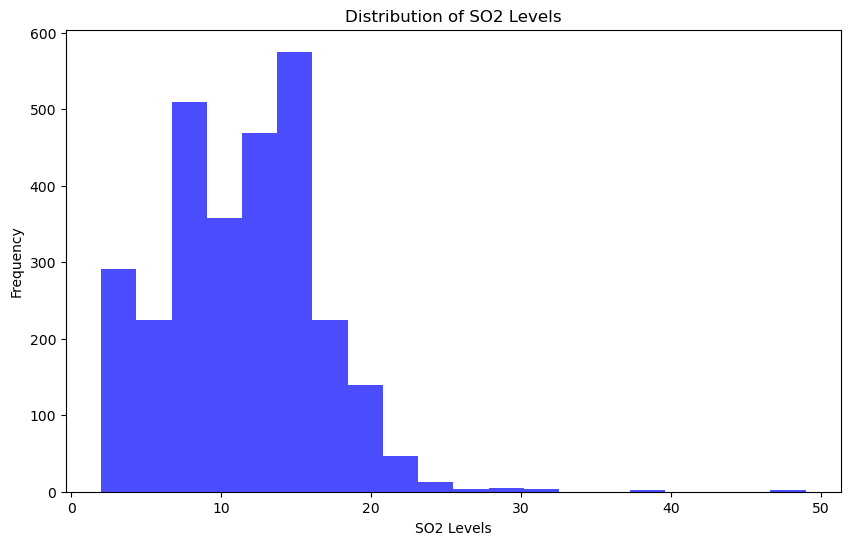

In [496]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['SO2'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of SO2 Levels')
plt.xlabel('SO2 Levels')
plt.ylabel('Frequency')
plt.show()

# 2.Scatter plot of NO2 vs. RSPM/PM10

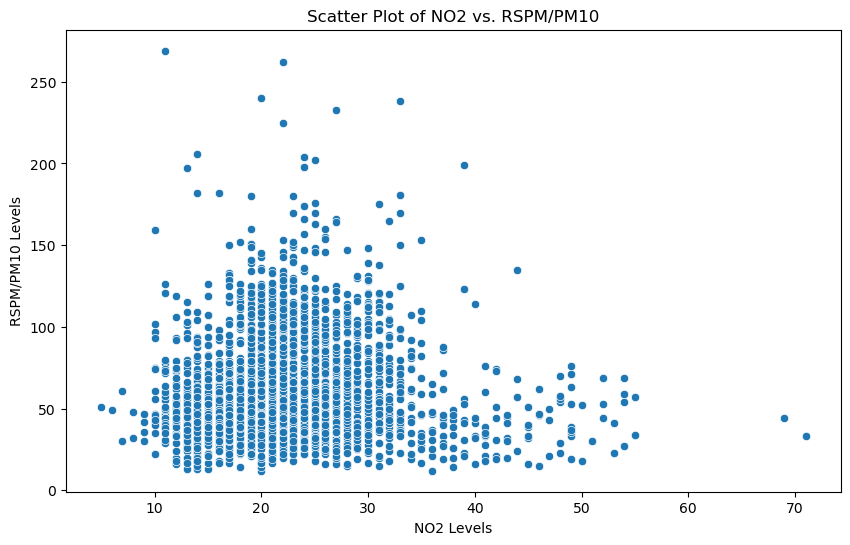

In [497]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='RSPM/PM10', data=dataset)
plt.title('Scatter Plot of NO2 vs. RSPM/PM10')
plt.xlabel('NO2 Levels')
plt.ylabel('RSPM/PM10 Levels')
plt.show()

# 3.Bar chart for State-wise SO2 levels

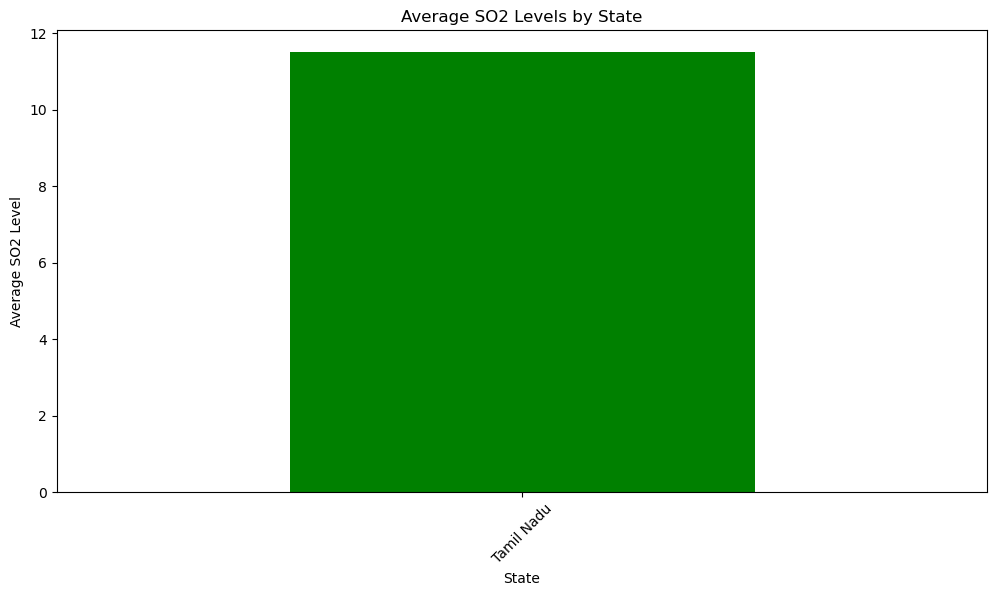

In [498]:
statewise_so2 = dataset.groupby('State')['SO2'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
statewise_so2.plot(kind='bar', color='green')
plt.title('Average SO2 Levels by State')
plt.xlabel('State')
plt.ylabel('Average SO2 Level')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

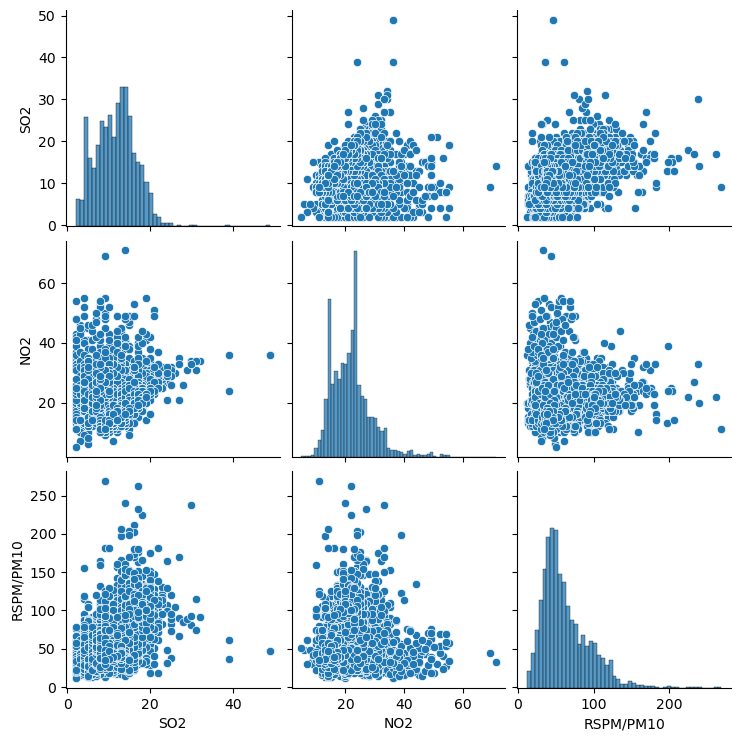

In [499]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)

array([[<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'RSPM/PM10'}>, <AxesSubplot:>]],
      dtype=object)

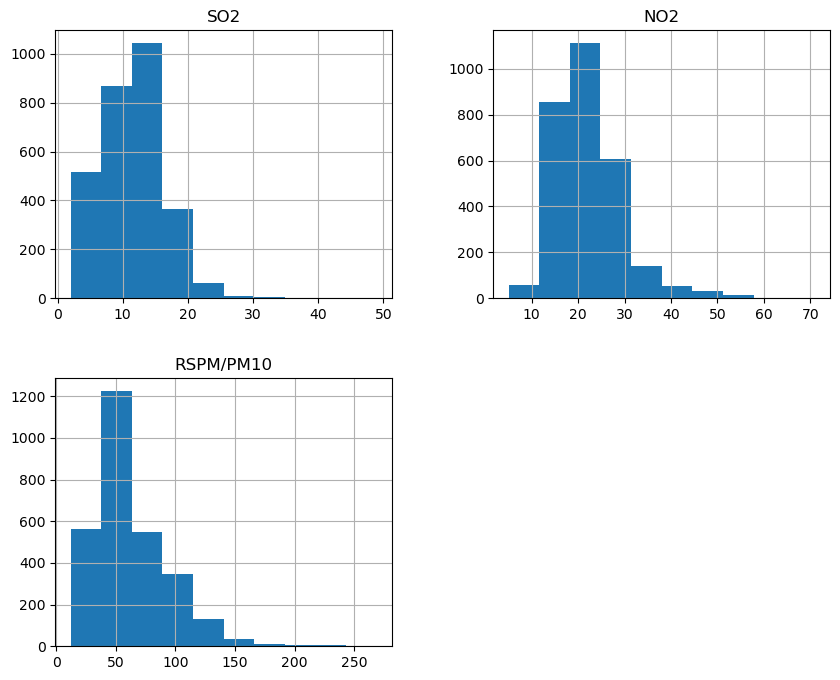

In [500]:
dataset.hist(figsize=(10,8))

# Visualising Correlation 

In [501]:
dataset.corr()


,SO2,NO2,RSPM/PM10
SO2,1.000000,0.078246,0.445152
NO2,0.078246,1.000000,0.068277
RSPM/PM10,0.445152,0.068277,1.000000


<AxesSubplot:>

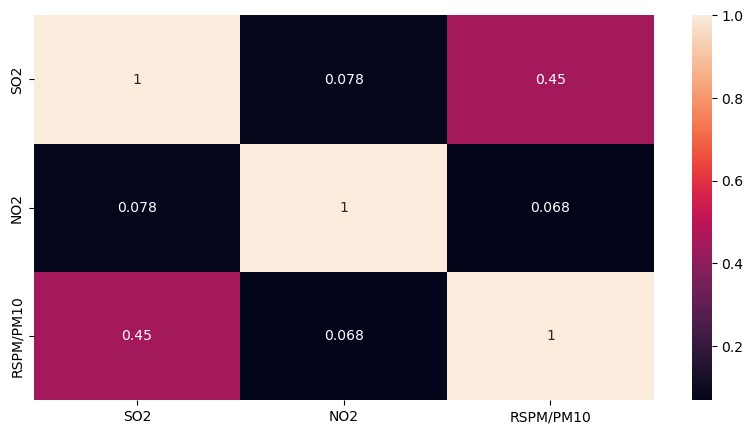

In [502]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)

# Training model:1_LINEAR REGRESSION

 FEATURE ENGINEERING:

In [503]:
dataset.drop('State', axis=1, inplace=True)
dataset.fillna(0,inplace=True)
s=dataset['RSPM/PM10']
X_train, X_test, y_train, y_test = train_test_split(dataset, s, test_size=0.2, random_state=42)

 Model Training:

In [504]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation:

In [505]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1.7858417732467776e-28

R-squared (R2) Score: 1.0


# Training Model:2_DECISION TREE REGRESSOR

 Model Training:

In [506]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

Model Evaluation:

Mean Squared Error: 4.396006397635617

R-squared: 0.9957863451133371


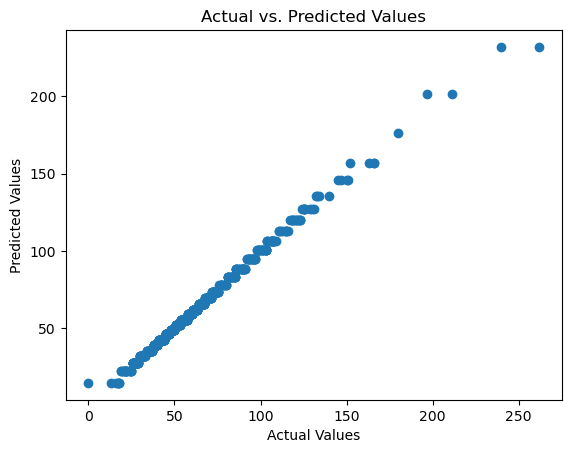

In [507]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


# TRAINING MODEL:3_K-NEAREST NEIGHBORS

 Model Training:

In [508]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn_model.fit(X_train, y_train) 

KNeighborsRegressor()

Model Evaluation:

In [509]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.5847222222222227

Mean Squared Error: 2.134861111111112

R-squared: 0.997953695436381
